In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib


import sys
sys.path.append("../src")

import feature_engineering as fe
import data_preprocessing as dp
import random_forest_train as rft

importlib.reload(dp)
from data_preprocessing import TennisPreprocessor

importlib.reload(rft) 
from random_forest_train import RandomForest

In [2]:
path_to_df = "../data/raw/atp_tennis.csv"
path_to_df_processed = "../data/processed/atp_tennis_processed.csv"

df = pd.read_csv(path_to_df)
df_processed = df.copy()

In [3]:
df_processed = fe.process_features(df_processed)

In [14]:
# df_processed, X_train, y_train, X_test, y_test, label_encoders = dp.preprocess_data(df_processed)

preprocessor = TennisPreprocessor(cutoff_date="2024-01-01")
X_train, y_train, X_test, y_test = preprocessor.fit_transform(df_processed)


=== FIT & TRANSFORM PREPROCESSOR ===
✅ Preprocessor saved to ../data/labels/preprocessor.pkl


In [10]:
# Define numeric columns

numeric_cols = df_processed.select_dtypes(include=np.number).columns

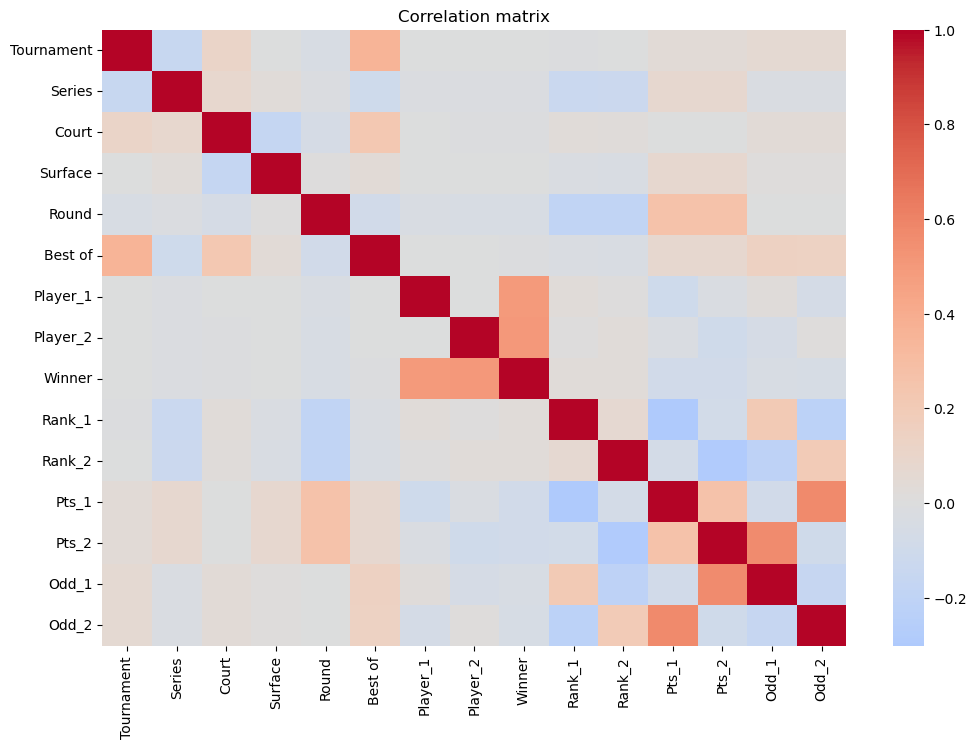

In [11]:
# Plot Correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df_processed[numeric_cols].corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation matrix")
plt.show()

In [12]:
df_processed.to_csv(path_to_df_processed, index=False)

In [8]:
random_forest = RandomForest(X_train, y_train, X_test, y_test)
random_forest.run_full_pipeline()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'